# <U>Apps Rating - Final Project 
#### Mai Shamos 206656746, Dor Bazdtni 308068378, Itay Kalderon 206026726

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.options.display.max_rows

500

In [2]:
df = pd.read_csv('apps ratings.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.00,10000.00,Free,0.00,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500000.00,Free,0.00,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.70,5000000.00,Free,0.00,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.00,50000000.00,Free,0.00,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.80,100000.00,Free,0.00,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
df.shape

(9659, 13)

In [4]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.00,9659.00,8432.00,9659.00,9659.00
mean,4.17,216592.56,20.40,7777506.73,1.10
std,0.54,1831319.57,21.83,53758278.68,16.85
min,1.00,0.00,0.01,0.00,0.00
25%,4.00,25.00,4.60,1000.00,0.00
50%,4.30,967.00,12.00,100000.00,0.00
75%,4.50,29401.00,28.00,1000000.00,0.00
max,5.00,78158306.00,100.00,1000000000.00,400.00


# <U>EDA - Exploratory Data Analysis

## 1. <U>Handling missing values

In [5]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 981.1+ KB


(None,
 App                  0
 Category             0
 Rating            1463
 Reviews              0
 Size              1227
 Installs             0
 Type                 1
 Price                0
 Content Rating       0
 Genres               0
 Last Updated         0
 Current Ver          8
 Android Ver          2
 dtype: int64)

### We can see that in 'Rating', 'Size', 'Current ver' and 'Android ver' we have missing values.

In [6]:
# We decieded to remove the missing values in the target varible. 
# There is no way to complete them.
df = df.dropna(subset=['Rating'])

In [7]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          4
Android Ver          2
dtype: int64

In [8]:
# In the columns with low number of missing values we decieded to remove the instances with NA.
df = df.dropna(subset=['Current Ver'])
df = df.dropna(subset=['Android Ver'])

In [9]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

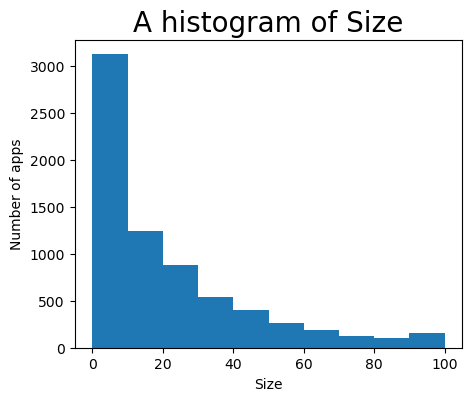

In [10]:
# In order to see how to best fill the missing values of size, we want to see its distribution.
plt.figure(figsize=(5, 4))
plt.hist(df['Size'])
plt.xlabel('Size')
plt.ylabel('Number of apps')
plt.title('A histogram of Size',size = 20)
plt.show()

In [11]:
# A calculation of the median to Size for imputaion of NA
size_med = df['Size'].median()
print("The median is:",size_med)

The median is: 13.0


In [12]:
df['Size'] = df["Size"].fillna(size_med)

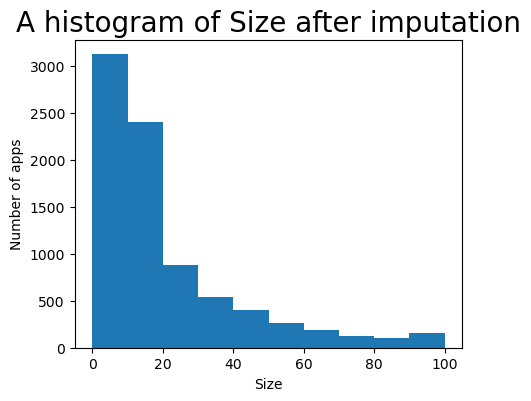

In [13]:
plt.figure(figsize=(5, 4))
plt.hist(df['Size'])
plt.xlabel('Size')
plt.ylabel('Number of apps')
plt.title('A histogram of Size after imputation',size = 20)
plt.show()

In [14]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### *The data is now cleaned from missing values.*

## 2. <U>Exploring and learning each feature individually

## <u> Numeric Features:

## <U>Rating - User rating of the app - Exploring our target variable

In [15]:
df['Rating'].describe()

count   8190.00
mean       4.17
std        0.54
min        1.00
25%        4.00
50%        4.30
75%        4.50
max        5.00
Name: Rating, dtype: float64

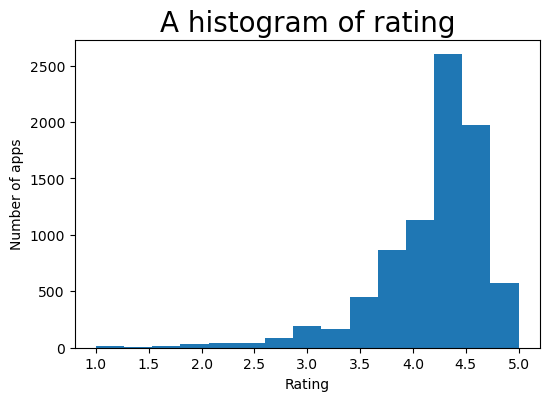

In [16]:
plt.figure(figsize=(6, 4))
plt.hist(df['Rating'],bins=15)
plt.xlabel('Rating')
plt.ylabel('Number of apps')
plt.title('A histogram of rating',size = 20)
plt.show()

### We can see most apps are rated between 3.5 to 5, we see a poisson distribution with a left tail and we realize our data is skewed. We need to remember that in each step of the way, and take it into consideration, when choosing a model and metrics when dealing with the data.

## <U>Size  - The size of the app

In [17]:
df['Size'].describe()

count   8190.00
mean      20.52
std       21.27
min        0.01
25%        5.80
50%       13.00
75%       27.00
max      100.00
Name: Size, dtype: float64

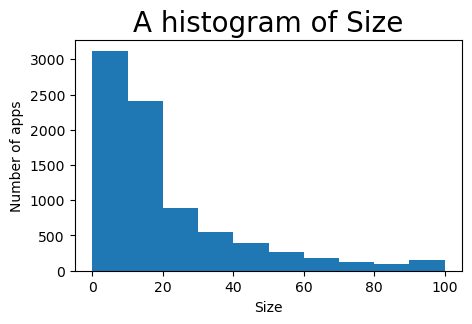

In [18]:
plt.figure(figsize=(5, 3))
plt.hist(df['Size'])
plt.xlabel('Size')
plt.ylabel('Number of apps')
plt.title('A histogram of Size',size = 20)
plt.show()

#### We have an exponential distribution with a right tail, most apps are small

In [19]:
df['Size log'] = np.log(df['Size']+1)

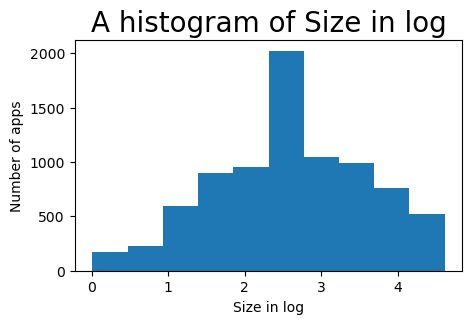

In [20]:
# We descided to log 'Size' feature and we added 1 due to low nubers in Size.
plt.figure(figsize=(5, 3))
plt.hist(df['Size log'])
plt.xlabel('Size in log')
plt.ylabel('Number of apps')
plt.title('A histogram of Size in log',size = 20)
plt.show()

### We saw that when we log the feature 'size', it becomes a normal distribution with a high peak in the middle due to replacing all the missing values with the median.

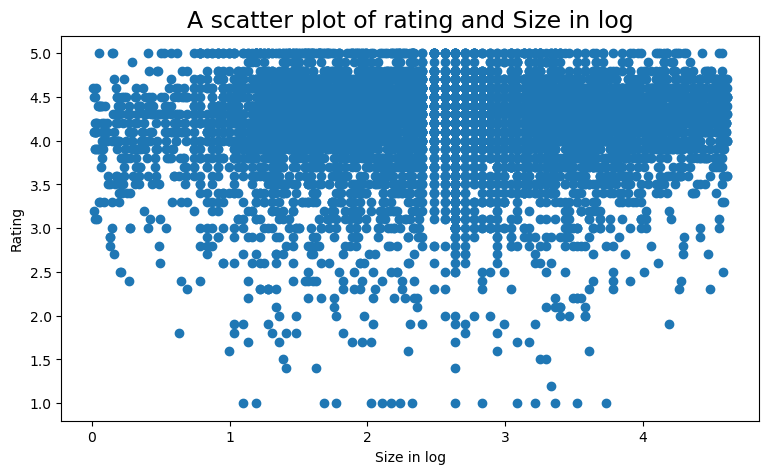

In [21]:
# We don't see a clear relationship between 'Rating' and 'Size' in log
plt.figure(figsize=(9, 5))
plt.scatter(df['Size log'],df['Rating'])
plt.xlabel('Size in log')
plt.ylabel('Rating')
plt.title('A scatter plot of rating and Size in log',size = 17)
plt.show()

## <U>Reviews - Number of reviews for the app

In [22]:
df['Reviews'].describe()

count       8190.00
mean      255435.44
std      1986309.48
min            1.00
25%          126.00
50%         3009.50
75%        43914.25
max     78158306.00
Name: Reviews, dtype: float64

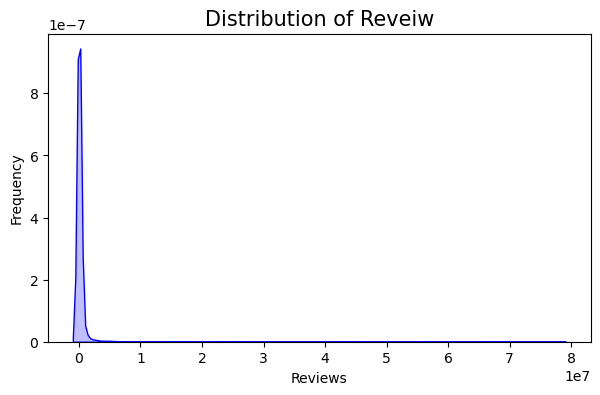

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4
g = sns.kdeplot(df.Reviews, color="blue", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 15)
plt.show()

### We can see that most of the apps have a low number of Reviews and we have some apps with large numbers of Reviews that we can't see clearly in the graph.

In [24]:
df['Reviews log'] = np.log(df['Reviews'])

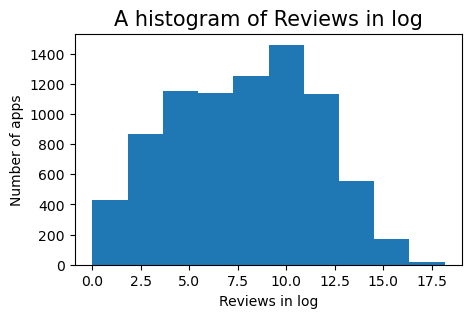

In [25]:
# We decided to log the feature of Reviews so we will see the distribution better.
plt.figure(figsize=(5, 3))
plt.hist(df['Reviews log'])
plt.xlabel('Reviews in log')
plt.ylabel('Number of apps')
plt.title('A histogram of Reviews in log',size = 15)
plt.show()

#### Here we see once again, that after logging the feature 'Reviews', we get a normal distribution.

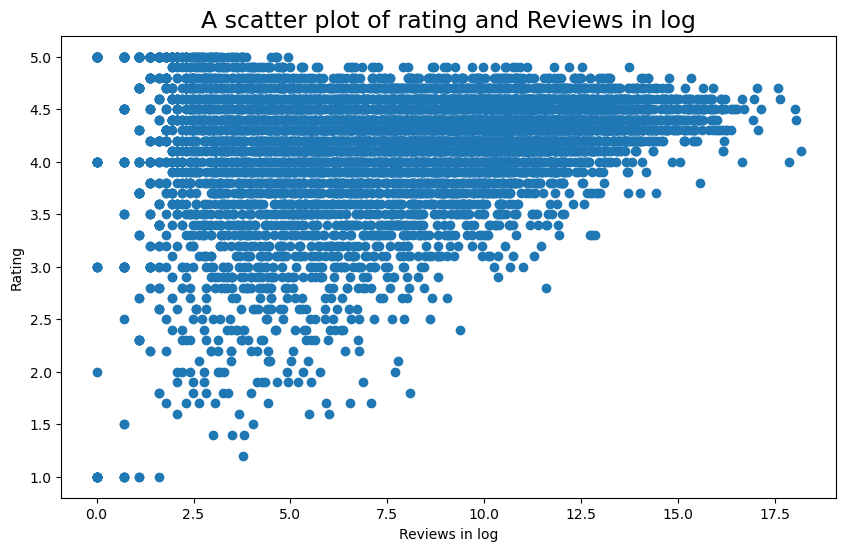

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Reviews log'],df['Rating'])
plt.xlabel('Reviews in log')
plt.ylabel('Rating')
plt.title('A scatter plot of rating and Reviews in log',size = 17)
plt.show()

### We see a relationship between 'Rating' and 'Reviews', as the reviews are higher, there is a higher chance to get better Rating.

## <U>Installs - Number of user downloads/installs for the app 

In [27]:
df['Installs'].describe()

count         8190.00
mean       9171612.86
std       58271701.78
min              1.00
25%          10000.00
50%         100000.00
75%        1000000.00
max     1000000000.00
Name: Installs, dtype: float64

In [28]:
df.groupby((df['Installs']))['Installs'].count()

Installs
1.00                3
5.00                9
10.00              69
50.00              56
100.00            303
500.00            199
1000.00           696
5000.00           424
10000.00          986
50000.00          456
100000.00        1094
500000.00         503
1000000.00       1414
5000000.00        607
10000000.00       937
50000000.00       202
100000000.00      188
500000000.00       24
1000000000.00      20
Name: Installs, dtype: int64

#### We see a very large scale of 'Installs'

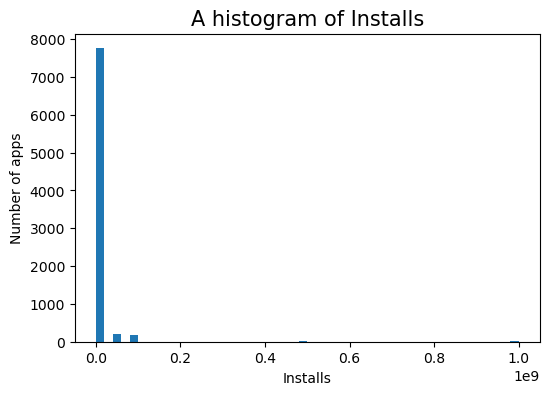

In [29]:
plt.figure(figsize=(6, 4))
plt.hist(df['Installs'], bins=50)
plt.xlabel('Installs')
plt.ylabel('Number of apps')
plt.title('A histogram of Installs',size = 15)
plt.show()

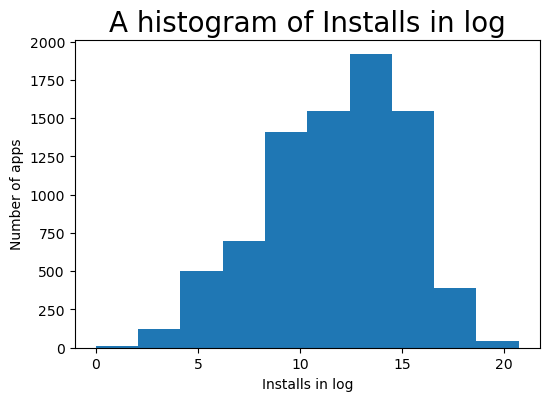

In [30]:
df['Installs log'] = np.log(df['Installs'])

# We decided to log the feature of Installs so we will see the distribution better.
plt.figure(figsize=(6, 4))
plt.hist(df['Installs log'])
plt.xlabel('Installs in log')
plt.ylabel('Number of apps')
plt.title('A histogram of Installs in log',size = 20)
plt.show()

#### We see the same behaviour after logging the feature of 'installs', we see a normal distribution.

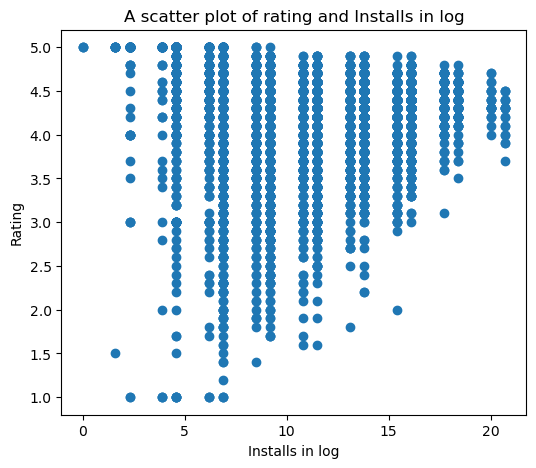

In [31]:
plt.figure(figsize=(6, 5))
plt.scatter(df['Installs log'],df['Rating'])
plt.xlabel('Installs in log')
plt.ylabel('Rating')
plt.title('A scatter plot of rating and Installs in log',size = 12)
plt.show()

### As we have a higher number of installs, we have a greater chance to get better ratings.

## <U>Price - Price of the app 

In [32]:
df['Price'].describe()

count   8190.00
mean       1.04
std       16.86
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      400.00
Name: Price, dtype: float64

In [33]:
df.groupby(df['Price'])['Price'].count() 

Price
0.00      7588
0.99       103
1.00         2
1.20         1
1.29         1
1.49        30
1.50         1
1.59         1
1.61         1
1.70         2
1.75         1
1.76         1
1.97         1
1.99        59
2.00         1
2.49        20
2.50         1
2.56         1
2.59         1
2.90         1
2.95         1
2.99       109
3.02         1
3.04         1
3.08         1
3.28         1
3.49         7
3.88         1
3.90         1
3.95         1
3.99        52
4.29         1
4.49         9
4.59         1
4.60         1
4.77         1
4.84         1
4.99        68
5.49         2
5.99        14
6.49         1
6.99        11
7.49         2
7.99         7
8.49         1
8.99         4
9.00         1
9.99        14
10.00        2
10.99        2
11.99        3
12.99        4
13.99        1
14.00        1
14.99        8
15.46        1
15.99        1
16.99        2
17.99        2
18.99        1
19.40        1
19.99        4
24.99        2
29.99        4
33.99        1
37.99        1
39.9

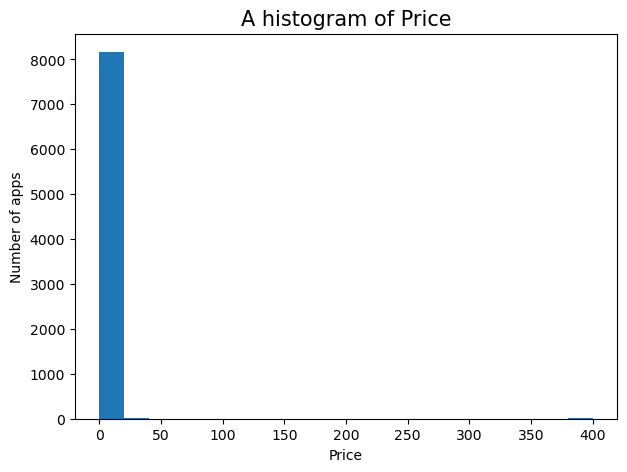

In [34]:
plt.figure(figsize=(7, 5))
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of apps')
plt.title('A histogram of Price',size = 15)
plt.show()

In [35]:
df.loc[df['Price'] > 80, 'Price'] = 80

#### In the row above, we tried handling the 15 outliers In the feature 'Price' and we didn't see any change in the model evaluation, so we decided not fixing the outsiders.

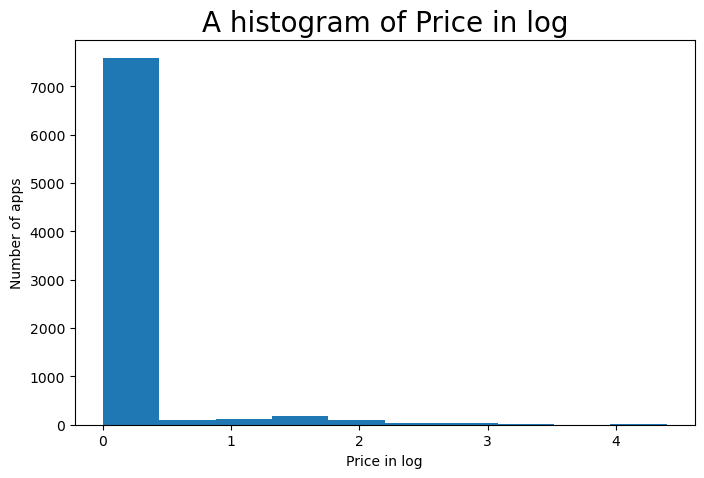

In [36]:
df['Price log'] = np.log(df['Price']+1)

# We decided to log the feature of Price so we will see the distribution better.
plt.figure(figsize=(8, 5))
plt.hist(df['Price log'])
plt.xlabel('Price in log')
plt.ylabel('Number of apps')
plt.title('A histogram of Price in log',size = 20)
plt.show()

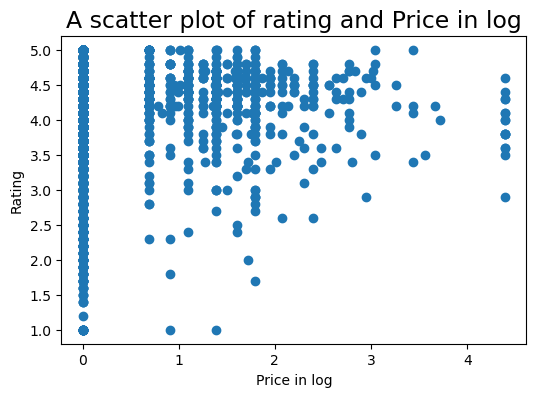

In [37]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Price log'],df['Rating'])
plt.xlabel('Price in log')
plt.ylabel('Rating')
plt.title('A scatter plot of rating and Price in log',size = 17)
plt.show()

### As we see, most of the apps are free, 'Price' = 0, and the paid apps have a large distribution.

## <U>Last Updated - Date when the app was last updated on Play Store

In [38]:
df['Last Updated'].describe()

count         8190
unique        1299
top       3-Aug-18
freq           245
Name: Last Updated, dtype: object

### We want to make the feature 'Last Updated' to a continuous feature. We will do so by converting the feature to the number of days passed since the last update till 9/8/2018.

In [39]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Days Since Last Update'] = (datetime(2018, 8, 9) - df['Last Updated']).dt.days

In [40]:
df['Days Since Last Update'].describe()

count   8190.00
mean     276.63
std      411.07
min        1.00
25%       21.00
50%       81.00
75%      357.00
max     3002.00
Name: Days Since Last Update, dtype: float64

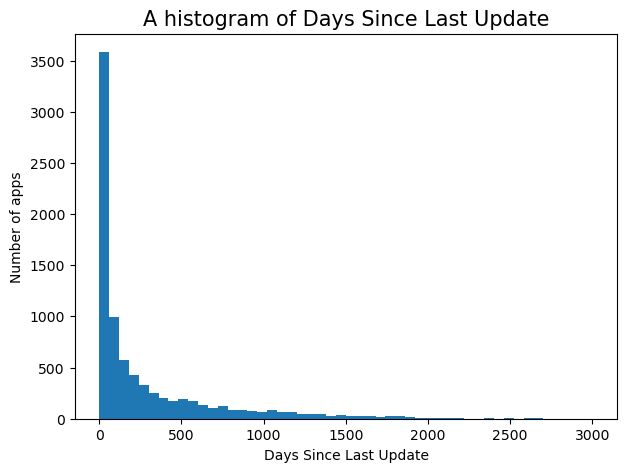

In [41]:
plt.figure(figsize=(7, 5))
plt.hist(df['Days Since Last Update'], bins=50)
plt.xlabel('Days Since Last Update')
plt.ylabel('Number of apps')
plt.title('A histogram of Days Since Last Update',size = 15)
plt.show()

### We see an exponential distribution in the feature 'days since last update' with a right tail and we see most of the apps were updated "recently".

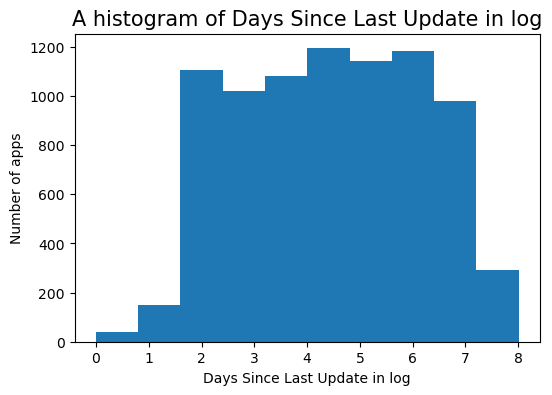

In [42]:
df['Days Since Last Update log'] = np.log(df['Days Since Last Update'])

# We decided to log the feature so we will see the distribution better.
plt.figure(figsize=(6, 4))
plt.hist(df['Days Since Last Update log'])
plt.xlabel('Days Since Last Update in log')
plt.ylabel('Number of apps')
plt.title('A histogram of Days Since Last Update in log',size = 15)
plt.show()

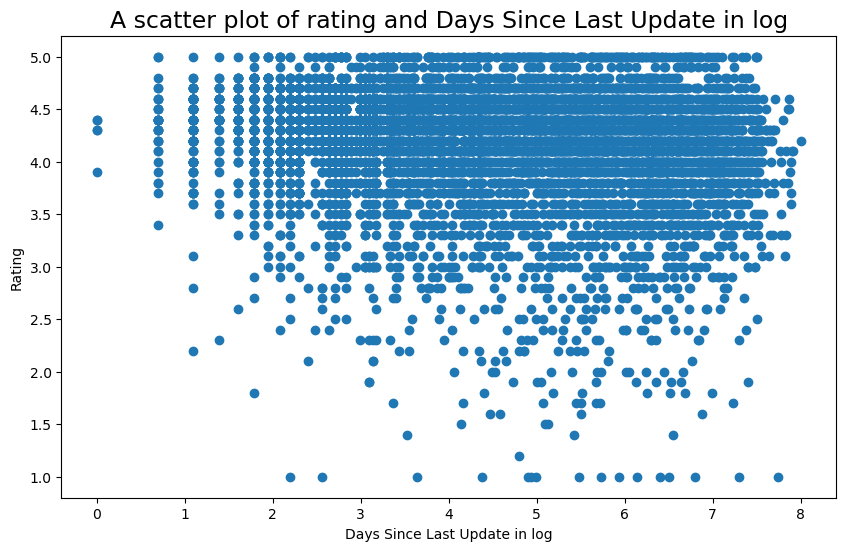

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Days Since Last Update log'],df['Rating'])
plt.xlabel('Days Since Last Update in log')
plt.ylabel('Rating')
plt.title('A scatter plot of rating and Days Since Last Update in log',size = 17)
plt.show()

### We don't see a clear relationship between 'days since last update in log' and 'Rating'.

## Type - Paid or Free

In [44]:
df.groupby(df['Type'])['Type'].count()

Type
Free    7588
Paid     602
Name: Type, dtype: int64

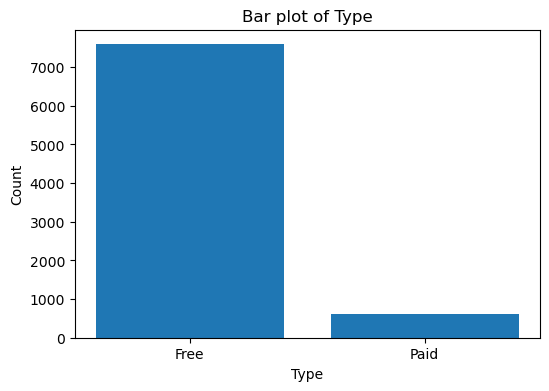

In [45]:
Type_counts = df['Type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(Type_counts.index, Type_counts.values)
plt.title('Bar plot of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [46]:
# We are converting the type variable to a binary variable called Paid
df['Paid'] = df['Type'].replace({'Paid': 1, 'Free': 0})

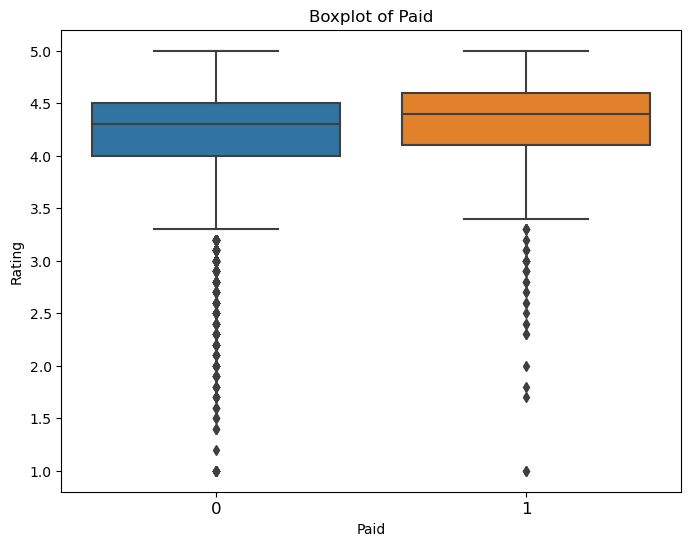

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Paid'],df['Rating'])
plt.title('Boxplot of Paid')
plt.xticks(fontsize=12)
plt.show()

### We can see the paid apps have a slightly higher rating than free apps.

## <U>Categorical features:

## <U>Current Ver - Current version of the app available on Play Store

In [48]:
df.groupby(df['Current Ver'])['Current Ver'].count()

Current Ver
0.0.0.2                    1
0.0.1                      7
0.0.2                      3
0.0.3                      1
0.0.4                      2
                          ..
v7.0.7.1.0625.1_06_0629    1
v7.0.9.1.0526.1_06_0704    1
v8.0.1.8.0629.1            1
v8[1.0.10]                 1
version 0.994              1
Name: Current Ver, Length: 2580, dtype: int64

In [49]:
df['Current Ver'].nunique()

2580

### In this feature we see a lot of unique value, some contain numbers and some contain letters or words. We don't see a clear pattern to reduce the number of unique values, so we decided to drop this feature from the data.

In [50]:
df = df.drop('Current Ver',axis=1)

## <U>Android Ver - Min required Android version

In [51]:
np.unique(list(df['Android Ver']))

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up',
       '2.0.1 and up', '2.1 and up', '2.2 and up', '2.3 and up',
       '2.3.3 and up', '3.0 and up', '3.1 and up', '3.2 and up',
       '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up', '4.1 - 7.1.1',
       '4.1 and up', '4.2 and up', '4.3 and up', '4.4 and up',
       '4.4W and up', '5.0 - 6.0', '5.0 - 8.0', '5.0 and up',
       '5.1 and up', '6.0 and up', '7.0 - 7.1.1', '7.0 and up',
       '7.1 and up', '8.0 and up', 'Varies with device'], dtype='<U18')

### We saw many different values for Android Ver and decided to group the numbers into categories by it's initial number, keep the 'Varies with device' as is.

In [52]:
df['Version'] = df['Android Ver'].str.split('.').str[0]
df['Version'] = df.apply(lambda x: x['Android Ver'] if pd.isnull(x['Version']) else x['Version'], axis=1)

In [53]:
df['Version'].value_counts()

4                     5213
2                     1128
Varies with device     947
5                      466
3                      240
1                      104
7                       45
6                       42
8                        5
Name: Version, dtype: int64

In [54]:
df.groupby(df['Version'])['Rating'].mean()

Version
1                    4.08
2                    4.08
3                    4.09
4                    4.19
5                    4.15
6                    3.90
7                    4.11
8                    4.10
Varies with device   4.25
Name: Rating, dtype: float64

#### Since we have only five instances in group 8, we decided to combine these instances with group 7, because they have a similar 'Rating' average.

In [55]:
df['Version'] = df['Version'].replace({'8': '7'})

In [56]:
df['Version'].value_counts()

4                     5213
2                     1128
Varies with device     947
5                      466
3                      240
1                      104
7                       50
6                       42
Name: Version, dtype: int64

In [57]:
df.groupby(df['Version'])['Rating'].mean()

Version
1                    4.08
2                    4.08
3                    4.09
4                    4.19
5                    4.15
6                    3.90
7                    4.11
Varies with device   4.25
Name: Rating, dtype: float64

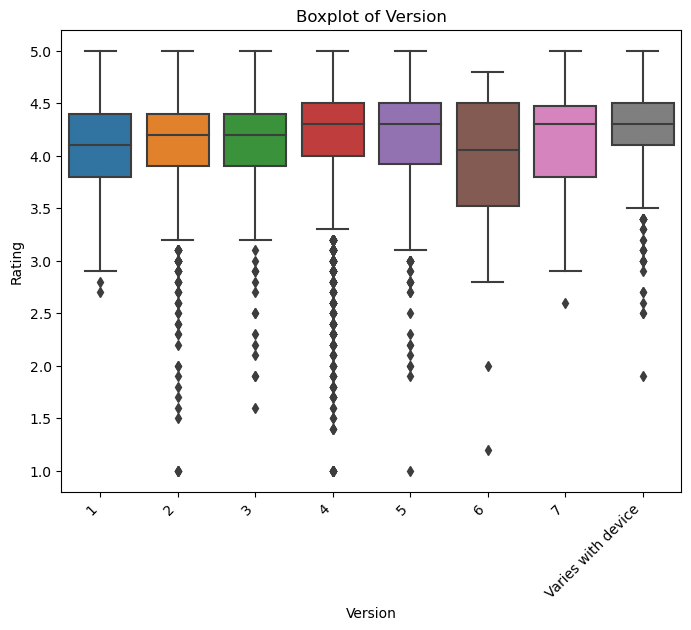

In [58]:
sorted_categories = df['Version'].sort_values().unique()
plt.figure(figsize=(8, 6))
sns.boxplot(df['Version'], df['Rating'], order=sorted_categories)
plt.title('Boxplot of Version')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [59]:
# Convert 'Version' into dummy variables
category_dummies = pd.get_dummies(df['Version'], prefix='Version')
df_dummies = pd.concat([df, category_dummies], axis=1)
df_dummies.drop(['Version','Android Ver'], axis=1, inplace=True)
df_dummies.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Size log,Reviews log,Installs log,Price log,Days Since Last Update,Days Since Last Update log,Paid,Version_1,Version_2,Version_3,Version_4,Version_5,Version_6,Version_7,Version_Varies with device
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.00,10000.00,Free,0.00,Everyone,Art & Design,2018-01-07,3.00,5.07,9.21,0.00,214,5.37,0,0,0,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500000.00,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.71,6.87,13.12,0.00,206,5.33,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.70,5000000.00,Free,0.00,Everyone,Art & Design,2018-08-01,2.27,11.38,15.42,0.00,8,2.08,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.00,50000000.00,Free,0.00,Teen,Art & Design,2018-06-08,3.26,12.28,17.73,0.00,62,4.13,0,0,0,0,1,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.80,100000.00,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.34,6.87,11.51,0.00,50,3.91,0,0,0,0,1,0,0,0,0


## <U>Content Rating - Age group the app is targeted at 

In [60]:
df.groupby(df['Content Rating'])['Content Rating'].count() 

Content Rating
Adults only 18+       3
Everyone           6612
Everyone 10+        305
Mature 17+          357
Teen                912
Unrated               1
Name: Content Rating, dtype: int64

In [61]:
df.groupby(df['Content Rating'])['Rating'].mean() 

Content Rating
Adults only 18+   4.30
Everyone          4.17
Everyone 10+      4.23
Mature 17+        4.12
Teen              4.23
Unrated           4.10
Name: Rating, dtype: float64

#### Once again, we see two groups with few instances so we decided to combine them to groups that are similar by their description.

In [62]:
df['Content Rating'] = df['Content Rating'].replace({'Adults only 18+': 'Mature 17+', 'Unrated': 'Everyone'})


In [63]:
df.groupby(df['Content Rating'])['Content Rating'].count() 

Content Rating
Everyone        6613
Everyone 10+     305
Mature 17+       360
Teen             912
Name: Content Rating, dtype: int64

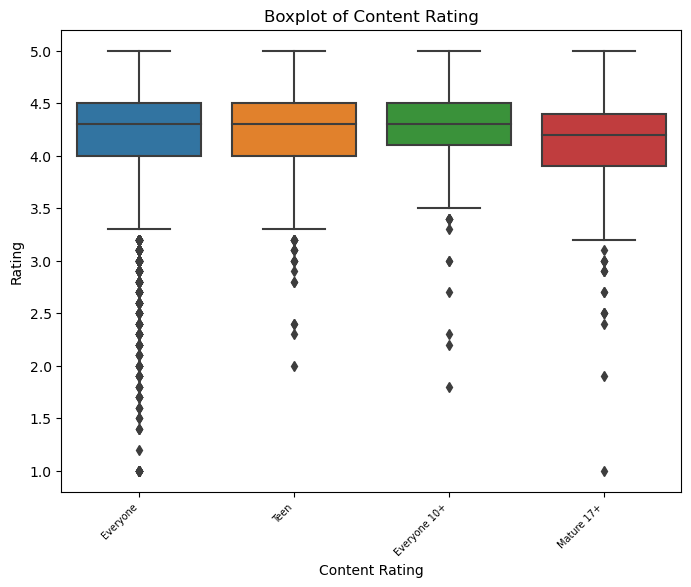

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Content Rating'],df['Rating'])
plt.title('Boxplot of Content Rating')
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=7)
plt.show()

In [65]:
# Convert 'Content Rating' into dummy variables
category_dummies = pd.get_dummies(df['Content Rating'], prefix='Content Rating')
df_dummies = pd.concat([df_dummies, category_dummies], axis=1)
df_dummies.drop('Content Rating', axis=1, inplace=True)
df_dummies.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Size log,Reviews log,Installs log,Price log,Days Since Last Update,Days Since Last Update log,Paid,Version_1,Version_2,Version_3,Version_4,Version_5,Version_6,Version_7,Version_Varies with device,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.00,10000.00,Free,0.00,Art & Design,2018-01-07,3.00,5.07,9.21,0.00,214,5.37,0,0,0,0,1,0,0,0,0,1,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14.00,500000.00,Free,0.00,Art & Design;Pretend Play,2018-01-15,2.71,6.87,13.12,0.00,206,5.33,0,0,0,0,1,0,0,0,0,1,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.70,5000000.00,Free,0.00,Art & Design,2018-08-01,2.27,11.38,15.42,0.00,8,2.08,0,0,0,0,1,0,0,0,0,1,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.00,50000000.00,Free,0.00,Art & Design,2018-06-08,3.26,12.28,17.73,0.00,62,4.13,0,0,0,0,1,0,0,0,0,0,0,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.80,100000.00,Free,0.00,Art & Design;Creativity,2018-06-20,1.34,6.87,11.51,0.00,50,3.91,0,0,0,0,1,0,0,0,0,1,0,0,0


## <U>Category - Category the app belongs to

In [66]:
print(df['Category'].nunique(), "different 'Category' values")

33 different 'Category' values


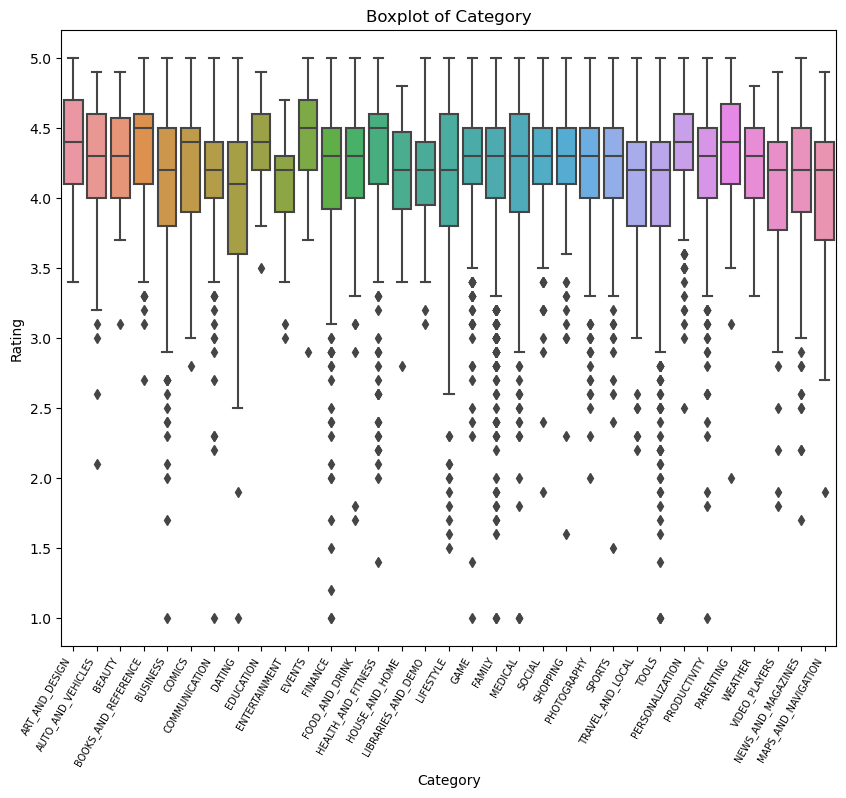

In [67]:
plt.figure(figsize=(10, 8))
sns.boxplot(df['Category'],df['Rating'])
plt.title('Boxplot of Category')
plt.xticks(rotation=60, ha='right')
plt.xticks(fontsize=7)
plt.show()

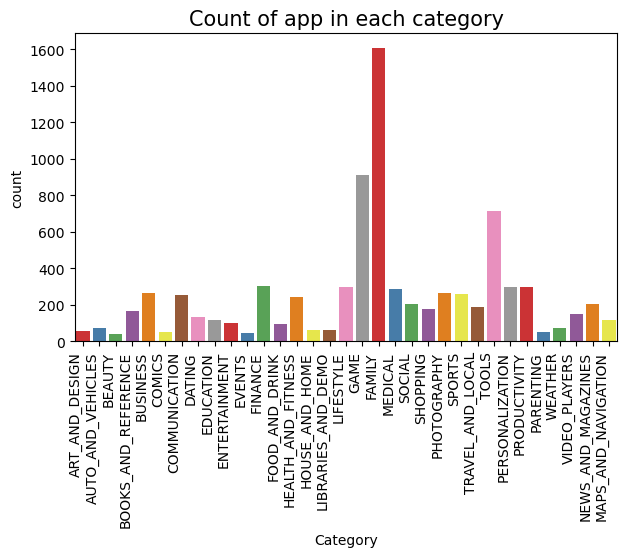

In [68]:
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of app in each category',size = 15)
plt.show()

#### We can see, we have a lot of apps in the category of family in game.

In [69]:
df.groupby(['Category'])['Category'].count()

Category
ART_AND_DESIGN           60
AUTO_AND_VEHICLES        73
BEAUTY                   42
BOOKS_AND_REFERENCE     169
BUSINESS                263
COMICS                   54
COMMUNICATION           256
DATING                  134
EDUCATION               118
ENTERTAINMENT           102
EVENTS                   45
FAMILY                 1607
FINANCE                 302
FOOD_AND_DRINK           94
GAME                    912
HEALTH_AND_FITNESS      244
HOUSE_AND_HOME           62
LIBRARIES_AND_DEMO       63
LIFESTYLE               301
MAPS_AND_NAVIGATION     118
MEDICAL                 290
NEWS_AND_MAGAZINES      204
PARENTING                50
PERSONALIZATION         296
PHOTOGRAPHY             263
PRODUCTIVITY            301
SHOPPING                180
SOCIAL                  203
SPORTS                  260
TOOLS                   717
TRAVEL_AND_LOCAL        187
VIDEO_PLAYERS           148
WEATHER                  72
Name: Category, dtype: int64

In [70]:
# Convert 'Category' into dummy variables
category_dummies = pd.get_dummies(df['Category'], prefix='Category')
df_dummies = pd.concat([df_dummies, category_dummies], axis=1)
df_dummies.drop('Category', axis=1, inplace=True)
df_dummies.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Size log,Reviews log,Installs log,Price log,Days Since Last Update,Days Since Last Update log,Paid,Version_1,Version_2,Version_3,Version_4,Version_5,Version_6,Version_7,Version_Varies with device,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.10,159,19.00,10000.00,Free,0.00,Art & Design,2018-01-07,3.00,5.07,9.21,0.00,214,5.37,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.90,967,14.00,500000.00,Free,0.00,Art & Design;Pretend Play,2018-01-15,2.71,6.87,13.12,0.00,206,5.33,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.70,87510,8.70,5000000.00,Free,0.00,Art & Design,2018-08-01,2.27,11.38,15.42,0.00,8,2.08,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.50,215644,25.00,50000000.00,Free,0.00,Art & Design,2018-06-08,3.26,12.28,17.73,0.00,62,4.13,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.30,967,2.80,100000.00,Free,0.00,Art & Design;Creativity,2018-06-20,1.34,6.87,11.51,0.00,50,3.91,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## <U>Genres - Genre the app belongs to

In [71]:
df.groupby(df['Genres'])['Genres'].count()

Genres
Action                                   292
Action;Action & Adventure                 12
Adventure                                 71
Adventure;Action & Adventure               5
Adventure;Brain Games                      1
Adventure;Education                        1
Arcade                                   171
Arcade;Action & Adventure                 13
Arcade;Pretend Play                        1
Art & Design                              54
Art & Design;Creativity                    6
Art & Design;Pretend Play                  1
Auto & Vehicles                           73
Beauty                                    42
Board                                     38
Board;Action & Adventure                   3
Board;Brain Games                         15
Board;Pretend Play                         1
Books & Reference                        169
Books & Reference;Education                2
Business                                 263
Card                                      44
Car

In [72]:
df['Genres'].nunique()

114

In [73]:
df.groupby(df['Genres'])['Rating'].mean()

Genres
Action                                  4.24
Action;Action & Adventure               4.32
Adventure                               4.18
Adventure;Action & Adventure            4.30
Adventure;Brain Games                   4.60
Adventure;Education                     4.10
Arcade                                  4.27
Arcade;Action & Adventure               4.34
Arcade;Pretend Play                     4.50
Art & Design                            4.38
Art & Design;Creativity                 4.35
Art & Design;Pretend Play               3.90
Auto & Vehicles                         4.19
Beauty                                  4.28
Board                                   4.27
Board;Action & Adventure                4.03
Board;Brain Games                       4.34
Board;Pretend Play                      4.80
Books & Reference                       4.34
Books & Reference;Education             4.20
Business                                4.10
Card                                    4.07
Car

In [74]:
category = np.unique(df['Category'])
for c in category:
    print(c)
    print(np.unique(df['Genres'][df['Category'] == c]))

ART_AND_DESIGN
['Art & Design' 'Art & Design;Creativity' 'Art & Design;Pretend Play']
AUTO_AND_VEHICLES
['Auto & Vehicles']
BEAUTY
['Beauty']
BOOKS_AND_REFERENCE
['Books & Reference']
BUSINESS
['Business']
COMICS
['Comics' 'Comics;Creativity']
COMMUNICATION
['Communication']
DATING
['Dating']
EDUCATION
['Education' 'Education;Action & Adventure' 'Education;Brain Games'
 'Education;Creativity' 'Education;Education' 'Education;Music & Video'
 'Education;Pretend Play']
ENTERTAINMENT
['Entertainment' 'Entertainment;Brain Games' 'Entertainment;Creativity'
 'Entertainment;Music & Video']
EVENTS
['Events']
FAMILY
['Action;Action & Adventure' 'Adventure;Action & Adventure'
 'Adventure;Brain Games' 'Adventure;Education' 'Arcade;Action & Adventure'
 'Arcade;Pretend Play' 'Art & Design;Creativity'
 'Board;Action & Adventure' 'Board;Brain Games' 'Board;Pretend Play'
 'Books & Reference;Education' 'Card;Action & Adventure' 'Casual'
 'Casual;Action & Adventure' 'Casual;Brain Games' 'Casual;Creativit

####  Here we see that most of the genres are included in one similar category 

### We wanted to reduce the number of different genres and combine all similar genres that begin with the same word due to low number of instances in the sub genres.

In [75]:
df['Genres'] = df['Genres'].str.split(';').str[0].fillna(df['Genres'])

In [76]:
df['Genres'] = df['Genres'].str.split(' &').str[0].fillna(df['Genres'])

In [77]:
df['Genres'].nunique()

47

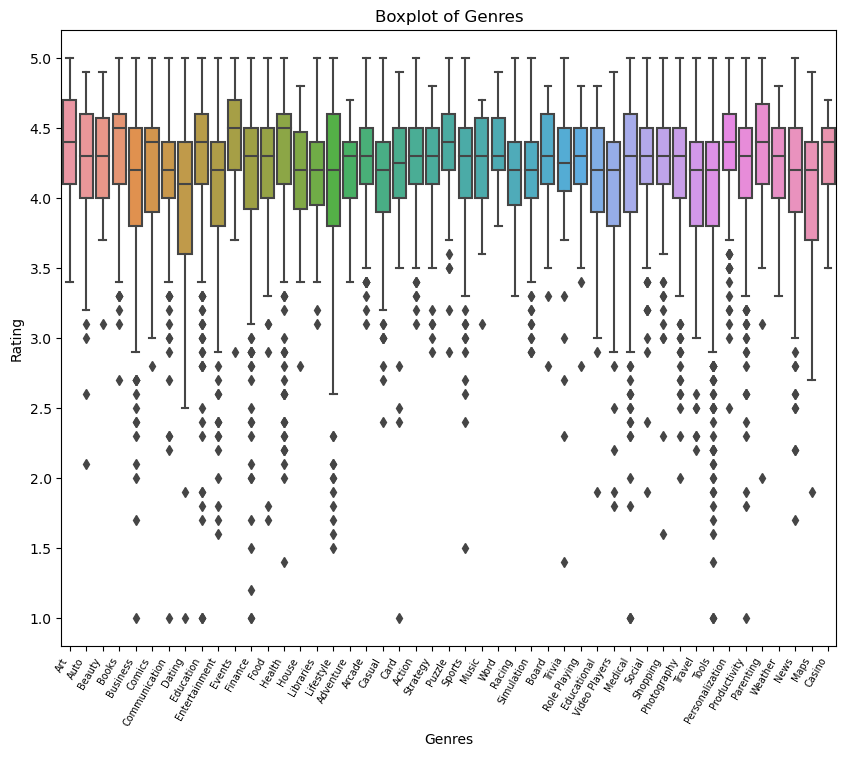

In [78]:
plt.figure(figsize=(10, 8))
sns.boxplot(df['Genres'],df['Rating'])
plt.title('Boxplot of Genres')
plt.xticks(rotation=60, ha='right')
plt.xticks(fontsize=7)
plt.show()

In [79]:
df.groupby(df['Genres'])['Genres'].count()

Genres
Action             304
Adventure           78
Arcade             185
Art                 61
Auto                73
Beauty              42
Board               57
Books              171
Business           263
Card                46
Casino              37
Casual             217
Comics              54
Communication      257
Dating             134
Education          498
Educational         93
Entertainment      502
Events              45
Finance            302
Food                94
Health             246
House               62
Libraries           63
Lifestyle          302
Maps               118
Medical            290
Music               22
News               204
Parenting           50
Personalization    296
Photography        263
Productivity       301
Puzzle             122
Racing             103
Role Playing       111
Shopping           180
Simulation         200
Social             203
Sports             270
Strategy            95
Tools              717
Travel             187
Triv

In [80]:
# Convert 'Genres' into dummy variables
category_dummies = pd.get_dummies(df['Genres'], prefix='Genres')
df_dummies = pd.concat([df_dummies, category_dummies], axis=1)
df_dummies.drop('Genres', axis=1, inplace=True)
df_dummies.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Size log,Reviews log,Installs log,Price log,Days Since Last Update,Days Since Last Update log,Paid,Version_1,Version_2,Version_3,Version_4,Version_5,Version_6,Version_7,Version_Varies with device,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Genres_Action,Genres_Adventure,Genres_Arcade,Genres_Art,Genres_Auto,Genres_Beauty,Genres_Board,Genres_Books,Genres_Business,Genres_Card,Genres_Casino,Genres_Casual,Genres_Comics,Genres_Communication,Genres_Dating,Genres_Education,Genres_Educational,Genres_Entertainment,Genres_Events,Genres_Finance,Genres_Food,Genres_Health,Genres_House,Genres_Libraries,Genres_Lifestyle,Genres_Maps,Genres_Medical,Genres_Music,Genres_News,Genres_Parenting,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Racing,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel,Genres_Trivia,Genres_Video Players,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.10,159,19.00,10000.00,Free,0.00,2018-01-07,3.00,5.07,9.21,0.00,214,5.37,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.90,967,14.00,500000.00,Free,0.00,2018-01-15,2.71,6.87,13.12,0.00,206,5.33,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.70,87510,8.70,5000000.00,Free,0.00,2018-08-01,2.27,11.38,15.42,0.00,8,2.08,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.50,215644,25.00,50000000.00,Free,0.00,2018-06-08,3.26,12.28,17.73,0.00,62,4.13,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.30,967,2.80,100000.00,Free,0.00,2018-06-20,1.34,6.87,11.51,0.00,50,3.91,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 3. <U>Correlation 

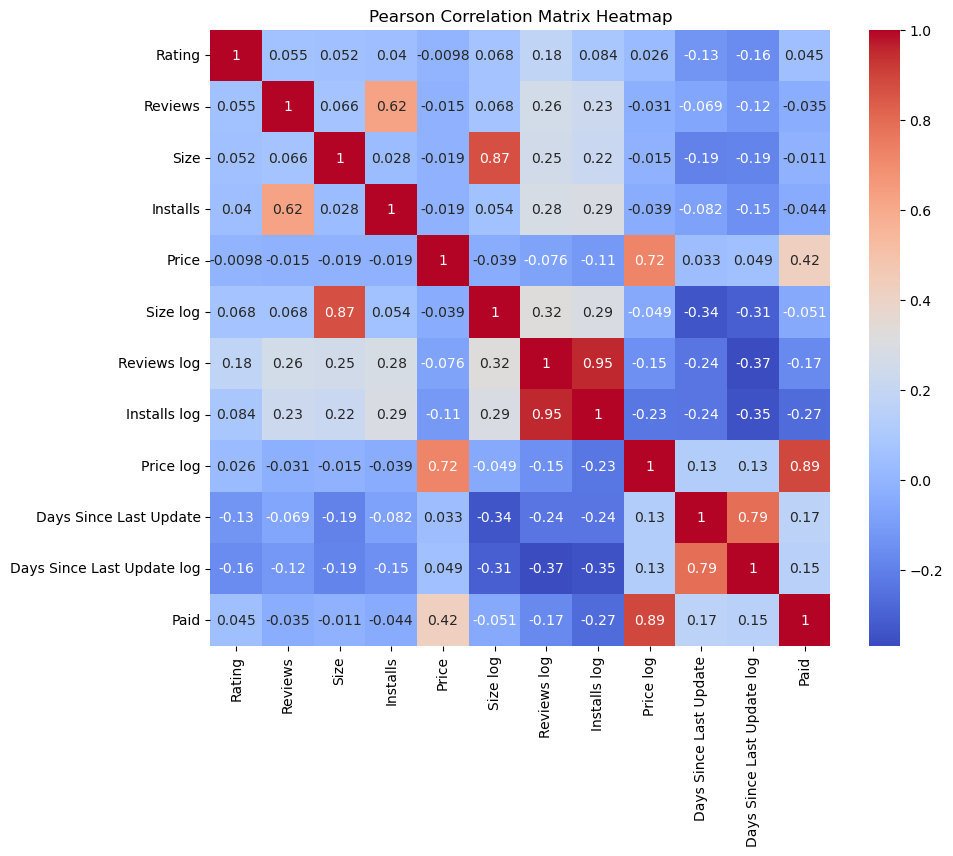

In [81]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Pearson Correlation Matrix Heatmap')
plt.show()

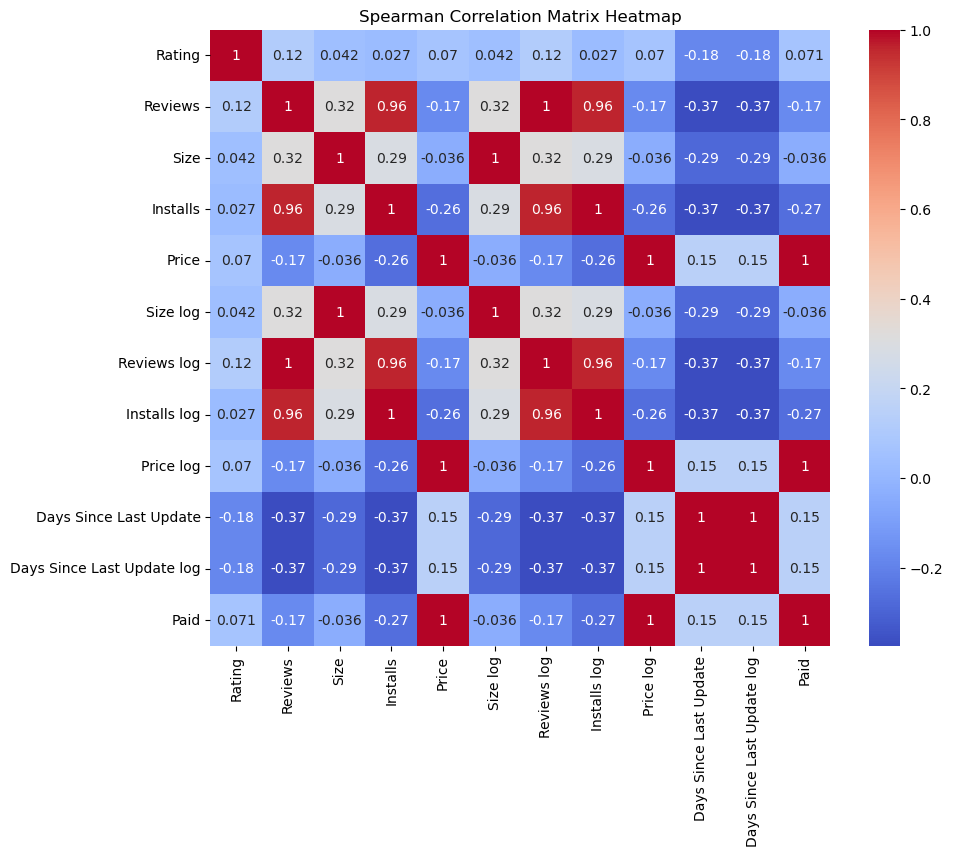

In [82]:
correlation_matrix = df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

### We can see that within the features and their log option we get a perfect Spearman correlation (1) which makes sense, and we will let the forward selection choose the better features for each model.

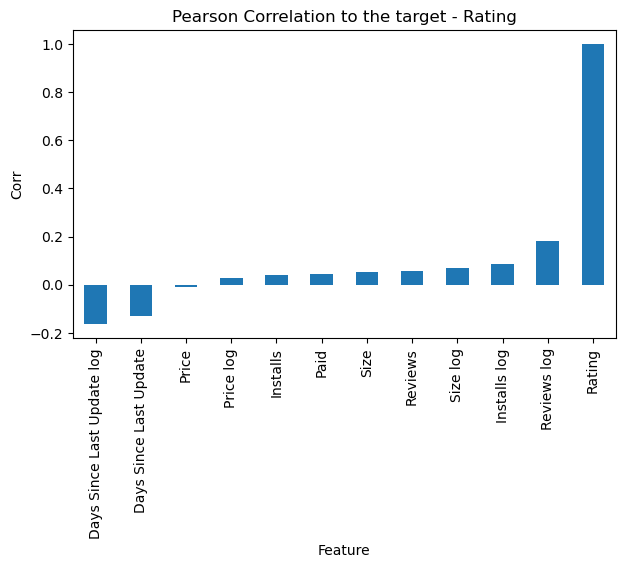

In [83]:
df.corr()['Rating'].sort_values().plot.bar()
plt.title('Pearson Correlation to the target - Rating')
plt.xlabel('Feature')
plt.ylabel('Corr')
plt.show()

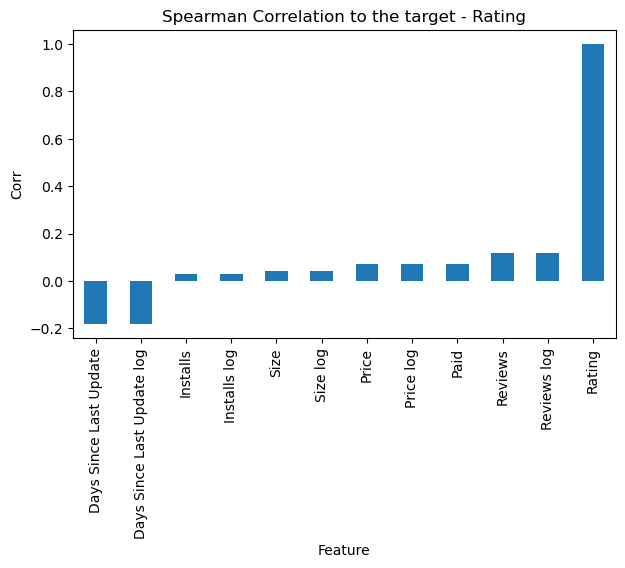

In [84]:
df.corr(method='spearman')['Rating'].sort_values().plot.bar()
plt.title('Spearman Correlation to the target - Rating')
plt.xlabel('Feature')
plt.ylabel('Corr')
plt.show()

#### We see different correlations in different features with our target variable - Rating, and we don't have a very high correlation in specific features.

# <U> Modeling Stage

### Spliting the data into training and test sets 

In [85]:
from sklearn.model_selection import train_test_split

X, y = df_dummies.drop(['Rating','App','Type','Last Updated'], axis=1), df_dummies['Rating']
# We removed from X the target variable - 'Rating', 'App' which is the ID,
# We need to remove'Type' and'Last Updated' Because we changed these features to numeric values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <U> Random Forest Regressor

## Trying a primary model

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor().fit(X_train, y_train)

y_pred = rf.predict(X_train)

# Calculate metrics - Traning set
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = sqrt(mse)   
r2 = r2_score(y_train, y_pred)

print("Traning set:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

y_pred = rf.predict(X_test)

# Calculate metrics - Testing set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)   
r2 = r2_score(y_test, y_pred)

print('')
print("Testing set:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Traning set:
MSE: 0.034500332264957266
RMSE: 0.18574265063511197
MAE: 0.12516956654456654
R2 Score: 0.8795925355223997

Testing set:
MSE: 0.24811900244200238
RMSE: 0.49811545091675524
MAE: 0.3370720390720391
R2 Score: 0.15572411810245657


### Hyper-parameter tuning

In [87]:
# Define the parameter grid 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10],
}

regressor = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse) 

print("Best Hyperparameters:", best_params)
print("")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}

MSE: 0.24368859154411862
RMSE: 0.49364824677508845
MAE: 0.33730606030617694
R2 Score: 0.17079950141113165


#### Trying to get better results with different hyperparameters

In [88]:
# Define the parameter grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [1, 2, 3],
}

regressor = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse) 

print("Best Hyperparameters:", best_params)
print("")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Best Hyperparameters: {'min_samples_leaf': 2, 'min_samples_split': 25, 'n_estimators': 200}

MSE: 0.24189299501112568
RMSE: 0.4918261837388547
MAE: 0.33608155028769626
R2 Score: 0.17690938752023433


In [89]:
# Define the parameter grid
param_grid = {
    'n_estimators': [350, 400],
    'min_samples_split': [25, 27, 29],
    'min_samples_leaf': [2, 3, 4],
}

regressor = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse) 

print("Best Hyperparameters:", best_params)
print("")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Best Hyperparameters: {'min_samples_leaf': 3, 'min_samples_split': 29, 'n_estimators': 350}

MSE: 0.24195236016183422
RMSE: 0.49188653179552927
MAE: 0.33666395452429243
R2 Score: 0.17670738539836883


#### We chose to do the hyper parameter tuning with the R squared measurement instead of the MSE which is more precise because we didn't get the best results when using the MSE in the grid search.

### The model with the best parameters:

In [90]:
best_model = RandomForestRegressor(min_samples_leaf=2, min_samples_split=27, n_estimators=400,random_state=12)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_train)

# Calculate metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = sqrt(mse)   
r2 = r2_score(y_train, y_pred)

print("Traning set:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

y_pred = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)   
r2 = r2_score(y_test, y_pred)

print('')
print("Testing set:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Traning set:
MSE: 0.1492380367065193
RMSE: 0.3863133918291201
MAE: 0.2610993231094535
R2 Score: 0.47915360740745916

Testing set:
MSE: 0.24097808575690488
RMSE: 0.49089518815823086
MAE: 0.3353269825110923
R2 Score: 0.1800225542259728


In [93]:
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
feature_names = X_train.columns
print("Feature Importance Ranking:")
for i, feature_index in enumerate(sorted_indices):
    feature_name = feature_names[feature_index]
    print(f"{i+1}.'{feature_name}': Importance = {sorted_importances[i]}")

Feature Importance Ranking:
1.'Reviews': Importance = 0.11779592147807692
2.'Reviews log': Importance = 0.11524195781481517
3.'Days Since Last Update log': Importance = 0.09890245942261834
4.'Days Since Last Update': Importance = 0.09432685267442298
5.'Size log': Importance = 0.0758619219829337
6.'Size': Importance = 0.07391161377725433
7.'Installs log': Importance = 0.04769193130595956
8.'Installs': Importance = 0.046813236256293675
9.'Version_4': Importance = 0.015365257838075973
10.'Price log': Importance = 0.009615034022108171
11.'Price': Importance = 0.009554764293800434
12.'Genres_Education': Importance = 0.00913367249916034
13.'Category_FAMILY': Importance = 0.008694507704189775
14.'Version_2': Importance = 0.008648172752799497
15.'Genres_Entertainment': Importance = 0.008469144015475093
16.'Category_TOOLS': Importance = 0.007996931696603201
17.'Genres_Lifestyle': Importance = 0.0077076545214798805
18.'Content Rating_Everyone': Importance = 0.007680531560876498
19.'Category_LIFE

### Forward selection

In [94]:
selected_features = []
best_mse = np.inf

while True:
    best_feature = None
    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_test_selected = X_test[features]

            # Fit Random Forest Regressor model
            best_model = RandomForestRegressor(min_samples_leaf=2, min_samples_split=27, n_estimators=400, random_state=12)
            best_model.fit(X_train_selected, y_train)

            # Evaluate model using MSE
            y_pred = best_model.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)

            if mse < best_mse:
                best_mse = mse
                best_feature = feature

    if best_feature is None:
        break

    selected_features.append(best_feature)
    print("Selected Features:", selected_features)
    print("Best MSE:", best_mse)
    print()


Selected Features: ['Installs']
Best MSE: 0.2781139626149488

Selected Features: ['Installs', 'Reviews']
Best MSE: 0.2659804369699393

Selected Features: ['Installs', 'Reviews', 'Days Since Last Update log']
Best MSE: 0.25988608809340413

Selected Features: ['Installs', 'Reviews', 'Days Since Last Update log', 'Price log']
Best MSE: 0.2545218533874402

Selected Features: ['Installs', 'Reviews', 'Days Since Last Update log', 'Price log', 'Genres_Education']
Best MSE: 0.2513094799225691

Selected Features: ['Installs', 'Reviews', 'Days Since Last Update log', 'Price log', 'Genres_Education', 'Category_PERSONALIZATION']
Best MSE: 0.24985291019183448

Selected Features: ['Installs', 'Reviews', 'Days Since Last Update log', 'Price log', 'Genres_Education', 'Category_PERSONALIZATION', 'Category_VIDEO_PLAYERS']
Best MSE: 0.2485117158316127

Selected Features: ['Installs', 'Reviews', 'Days Since Last Update log', 'Price log', 'Genres_Education', 'Category_PERSONALIZATION', 'Category_VIDEO_PLAY

Selected Features: ['Installs', 'Reviews', 'Days Since Last Update log', 'Price log', 'Genres_Education', 'Category_PERSONALIZATION', 'Category_VIDEO_PLAYERS', 'Category_BUSINESS', 'Category_FINANCE', 'Category_TOOLS', 'Content Rating_Everyone', 'Category_TRAVEL_AND_LOCAL', 'Category_MEDICAL', 'Genres_Entertainment', 'Category_HEALTH_AND_FITNESS', 'Genres_Sports', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING', 'Version_2', 'Version_6', 'Genres_Educational', 'Category_BEAUTY', 'Genres_Action', 'Category_COMICS', 'Category_SHOPPING', 'Genres_Arcade', 'Genres_Strategy']
Best MSE: 0.2382159286598827

Selected Features: ['Installs', 'Reviews', 'Days Since Last Update log', 'Price log', 'Genres_Education', 'Category_PERSONALIZATION', 'Category_VIDEO_PLAYERS', 'Category_BUSINESS', 'Category_FINANCE', 'Category_TOOLS', 'Content Rating_Everyone', 'Category_TRAVEL_AND_LOCAL', 'Category_MEDICAL', 'Genres_Entertainment', 'Category_HEALTH_AND_FITNESS', 'Genres_Sports', 'Category_NEWS_AND_MAGA

In [95]:
selected_features_rf = selected_features

In [115]:
rf = RandomForestRegressor(min_samples_leaf=2, min_samples_split=27, n_estimators=400,random_state=12)

# Fit the model with the best features
rf.fit(X_train[selected_features_rf], y_train)
y_train_pred = rf.predict(X_train[selected_features_rf])

# Evaluation for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Train result:")
print(f"MSE: {mse_train}")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R2 Score: {r2_train}")

y_test_pred = rf.predict(X_test[selected_features_rf])

# Evaluation for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_rf = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_rf)
r2_test = r2_score(y_test, y_test_pred)

print(" ")
print("Test result:")
print(f"MSE: {mse_rf}")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R2 Score: {r2_test}")

Train result:
MSE: 0.1611692130046135
MAE: 0.2736725772407177
RMSE: 0.4014588559299863
R2 Score: 0.43751335086569965
 
Test result:
MSE: 0.23741233484260363
MAE: 0.33616237349688993
RMSE: 0.48724976638537615
R2 Score: 0.19215575429597698


In [116]:
models_errors = {}
models_errors['Random Forest Regressor'] = mse_rf

# <u>Linear Regrassion

## Trying a primary model

In [117]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

# Fit and predict
linear_reg.fit(X_train, y_train)
y_train_pred = linear_reg.predict(X_train)

# Evaluation for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Train result:")
print(f"MSE: {mse_train}")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R2 Score: {r2_train}")

y_test_pred = linear_reg.predict(X_test)

# Evaluation for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(" ")
print("Test result:")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R2 Score: {r2_test}")

Train result:
MSE: 0.23810976325898173
MAE: 0.33618836641602756
RMSE: 0.48796492011104825
R2 Score: 0.16898792042949118
 
Test result:
MSE: 5.5591689658662995e+17
MAE: 18422475.875147942
RMSE: 745598348.0310495
R2 Score: -1.8916214538510892e+18


### Hyper-parameter tuning

In [118]:
param_grid = {'normalize': [True, False]}

regressor = LinearRegression()

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Evaluation for test set
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R2 Score: {r2_test}")

Best Hyperparameters: {'normalize': False}

MSE: 5.5591689658662995e+17
RMSE: 745598348.0310495
MAE: 18422475.875147942
R2 Score: -1.8916214538510892e+18


### Forward selection 

In [119]:
selected_features = []
best_mse = np.inf

while True:
    best_feature = None
    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_test_selected = X_test[features]

            # Fit Linear Regression model
            model = LinearRegression()
            model.fit(X_train_selected, y_train)

            # Evaluate model using MSE
            y_pred = model.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)

            if mse < best_mse:
                best_mse = mse
                best_feature = feature

    if best_feature is None:
        break

    selected_features.append(best_feature)
    print("Selected Features:", selected_features)
    print("Best MSE:", best_mse)
    print()


Selected Features: ['Reviews log']
Best MSE: 0.283034440187578

Selected Features: ['Reviews log', 'Installs log']
Best MSE: 0.26047042133367915

Selected Features: ['Reviews log', 'Installs log', 'Genres_Education']
Best MSE: 0.2575169579954057

Selected Features: ['Reviews log', 'Installs log', 'Genres_Education', 'Days Since Last Update log']
Best MSE: 0.2545138778916875

Selected Features: ['Reviews log', 'Installs log', 'Genres_Education', 'Days Since Last Update log', 'Category_PERSONALIZATION']
Best MSE: 0.2529998262630097

Selected Features: ['Reviews log', 'Installs log', 'Genres_Education', 'Days Since Last Update log', 'Category_PERSONALIZATION', 'Category_EVENTS']
Best MSE: 0.2519765600761457

Selected Features: ['Reviews log', 'Installs log', 'Genres_Education', 'Days Since Last Update log', 'Category_PERSONALIZATION', 'Category_EVENTS', 'Category_TOOLS']
Best MSE: 0.2514826763919112

Selected Features: ['Reviews log', 'Installs log', 'Genres_Education', 'Days Since Last U

Selected Features: ['Reviews log', 'Installs log', 'Genres_Education', 'Days Since Last Update log', 'Category_PERSONALIZATION', 'Category_EVENTS', 'Category_TOOLS', 'Size', 'Price', 'Category_MAPS_AND_NAVIGATION', 'Category_NEWS_AND_MAGAZINES', 'Category_COMMUNICATION', 'Version_6', 'Category_DATING', 'Category_BEAUTY', 'Genres_Video Players', 'Genres_Strategy', 'Genres_Card', 'Category_TRAVEL_AND_LOCAL', 'Category_PARENTING', 'Genres_Role Playing', 'Category_BUSINESS', 'Category_ENTERTAINMENT', 'Reviews', 'Installs', 'Category_FINANCE', 'Genres_Maps']
Best MSE: 0.24637139306373956



In [120]:
selected_features_lr = selected_features

In [121]:
linear_reg = LinearRegression(normalize=False)

# Fit the model with the best features
linear_reg.fit(X_train[selected_features_lr], y_train)
y_train_pred = linear_reg.predict(X_train[selected_features_lr])

# Evaluation for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Train result:")
print(f"MSE: {mse_train}")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R2 Score: {r2_train}")

y_test_pred = linear_reg.predict(X_test[selected_features_lr])

# Evaluation for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_lr = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_lr)
r2_test = r2_score(y_test, y_test_pred)

print(" ")
print("Test result:")
print(f"MSE: {mse_lr}")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R2 Score: {r2_test}")

Train result:
MSE: 0.2432088906708579
MAE: 0.3405820149565712
RMSE: 0.49316213426302097
R2 Score: 0.1511917729026494
 
Test result:
MSE: 0.24637139306373956
MAE: 0.34075802404766076
RMSE: 0.49635812984551747
R2 Score: 0.16167071805862132


In [122]:
models_errors['Linear Regrassion'] = mse_lr

## <u>KNN Regrassion

## Normalizing the data for the KNN with Min-Max 

In [123]:
X_min = np.min(X_train, axis=0)
X_max = np.max(X_train, axis=0)

# Scale the training and test sets using min-max scaling
X_train = (X_train - X_min) / (X_max - X_min)
X_test = (X_test - X_min) / (X_max - X_min)

## Trying a primary model

In [124]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

# Calculate evaluation metrics train
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)   
r2 = r2_score(y_train, y_pred)

print("Train result:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

y_pred = knn.predict(X_test)

# Calculate evaluation metrics test
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   
r2 = r2_score(y_test, y_pred)

print(" ")
print("Test result:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Train result:
MSE: 0.19245189255189257
MAE: 0.3061965811965812
RMSE: 0.43869339241877414
R2 Score: 0.3283356160709816
 
Test result:
MSE: 0.2927347985347985
MAE: 0.3723687423687424
RMSE: 0.5410497190968668
R2 Score: 0.003909705574293598


### Hyper-parameter tuning

In [125]:
param_grid = {
    'n_neighbors': [23,24,25,26]
}

regressor = KNeighborsRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_train)

# Calculate evaluation metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)   
r2 = r2_score(y_train, y_pred)

print("Train result:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

y_pred = best_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse) 

print("test result")
print("")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
print("Best Hyperparameters:", best_params)

Train result:
MSE: 0.24344789743589743
MAE: 0.34713675213675216
RMSE: 0.49340439543633724
R2 Score: 0.15035763025293836
test result

MSE: 0.2716411623931624
RMSE: 0.521192059027344
MAE: 0.3639120879120879
R2 Score: 0.07568513623712048
Best Hyperparameters: {'n_neighbors': 25}


#### Because this model performed worse than the Randon Forest we show only the best hyperparameter test we got. We tried n_neighbors = 3,5,7,13,18,23,24,25,26.

### The model with the best parameters:

In [126]:
best_model = KNeighborsRegressor(n_neighbors=25)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_train)

# Calculate metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = sqrt(mse)   
r2 = r2_score(y_train, y_pred)

print("Traning set:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

y_pred = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)   
r2 = r2_score(y_test, y_pred)

print('')
print("Testing set:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Traning set:
MSE: 0.24344789743589743
RMSE: 0.49340439543633724
MAE: 0.34713675213675216
R2 Score: 0.15035763025293836

Testing set:
MSE: 0.2716411623931624
RMSE: 0.521192059027344
MAE: 0.3639120879120879
R2 Score: 0.07568513623712048


### Forward selection


In [127]:
selected_features = []
best_mse = np.inf

while True:
    best_feature = None
    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_test_selected = X_test[features]

            best_model = KNeighborsRegressor(n_neighbors=25)
            best_model.fit(X_train_selected, y_train)

            y_pred = best_model.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)

            if mse < best_mse:
                best_mse = mse
                best_feature = feature

    if best_feature is None:
        break

    selected_features.append(best_feature)
    print("Selected Features:", selected_features)
    print("Best MSE:", best_mse)
    print()

Selected Features: ['Reviews log']
Best MSE: 0.2893775042735042

Selected Features: ['Reviews log', 'Installs log']
Best MSE: 0.26155140415140415

Selected Features: ['Reviews log', 'Installs log', 'Price log']
Best MSE: 0.2558607765567766

Selected Features: ['Reviews log', 'Installs log', 'Price log', 'Category_PERSONALIZATION']
Best MSE: 0.2525568742368743

Selected Features: ['Reviews log', 'Installs log', 'Price log', 'Category_PERSONALIZATION', 'Genres_Education']
Best MSE: 0.25016964102564104

Selected Features: ['Reviews log', 'Installs log', 'Price log', 'Category_PERSONALIZATION', 'Genres_Education', 'Category_EVENTS']
Best MSE: 0.24592062515262514

Selected Features: ['Reviews log', 'Installs log', 'Price log', 'Category_PERSONALIZATION', 'Genres_Education', 'Category_EVENTS', 'Category_VIDEO_PLAYERS']
Best MSE: 0.24539021245421244

Selected Features: ['Reviews log', 'Installs log', 'Price log', 'Category_PERSONALIZATION', 'Genres_Education', 'Category_EVENTS', 'Category_VID

In [128]:
selected_features_knn = selected_features

In [129]:
knn = KNeighborsRegressor(n_neighbors=25)

knn.fit(X_train[selected_features_knn], y_train)
y_pred = knn.predict(X_train[selected_features_knn])

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)   
r2 = r2_score(y_train, y_pred)

print("Train result:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

y_pred = knn.predict(X_test[selected_features_knn])

mae = mean_absolute_error(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse_knn)   
r2 = r2_score(y_test, y_pred)

print(" ")
print("Test result:")
print(f"MSE: {mse_knn}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Train result:
MSE: 0.2335088180708181
MAE: 0.3355683760683761
RMSE: 0.4832275013601959
R2 Score: 0.18504539315330892
 
Test result:
MSE: 0.24272017582417582
MAE: 0.3466568986568987
RMSE: 0.49266639404791535
R2 Score: 0.1740947348594012


In [130]:
models_errors['KNN Regrassion'] = mse_knn

## <u>Ada Boost Regressor

#### We kept the data normalised because we got better results in the Ada boost testings.

## Trying a primary model

In [131]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
adaboost_reg.fit(X_train, y_train)

y_train_pred = adaboost_reg.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Train result:")
print(f"MSE: {mse_train}")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R2 Score: {r2_train}")

y_test_pred = adaboost_reg.predict(X_test)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(" ")
print("Test result:")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R2 Score: {r2_test}")

Train result:
MSE: 0.0012072649572649565
MAE: 0.010057997557997559
RMSE: 0.034745718545814486
R2 Score: 0.9957865996379235
 
Test result:
MSE: 0.2632905982905983
MAE: 0.32814407814407814
RMSE: 0.5131185031653003
R2 Score: 0.10409964622082168


### Hyper-parameter tuning

In [132]:
param_grid = {
    'base_estimator__max_depth': [16,18,20], 
    'n_estimators': [180,200,230] 
}

base_estimator = DecisionTreeRegressor()
ada_boost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best R-squared Score:", r2)
print("Mean Squared Error:", mse)

Best Hyperparameters: {'base_estimator__max_depth': 18, 'n_estimators': 200}
Best R-squared Score: 0.1754646048726204
Mean Squared Error: 0.24231759322239496


### The model with the best parameters:

In [133]:
best_model = AdaBoostRegressor(n_estimators=200, base_estimator=DecisionTreeRegressor(max_depth=18), random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_train)

# Calculate metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = sqrt(mse)   
r2 = r2_score(y_train, y_pred)

print("Traning set:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

y_pred = best_model.predict(X_test)

# Calculate metrics- test
mae = mean_absolute_error(y_test, y_pred)
mse_ada = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse_ada)   
r2 = r2_score(y_test, y_pred)

print('')
print("Testing set:")
print(f"MSE: {mse_ada}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Traning set:
MSE: 0.02755566318589414
RMSE: 0.1659989854965811
MAE: 0.12765371406621678
R2 Score: 0.9038296932698722

Testing set:
MSE: 0.24231759322239496
RMSE: 0.49225764922690124
MAE: 0.32787439864715995
R2 Score: 0.1754646048726204


### Forward Selection

In [134]:
selected_features = []
best_mse = np.inf

while True:
    best_feature = None
    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_test_selected = X_test[features]

           
            model = AdaBoostRegressor(n_estimators=200, base_estimator=DecisionTreeRegressor(max_depth=18), random_state=42)
            model.fit(X_train_selected, y_train)

            
            y_pred = model.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)

            if mse < best_mse:
                best_mse = mse
                best_feature = feature

    if best_feature is None:
        break

    selected_features.append(best_feature)
    print("Selected Features:", selected_features)
    print("Best MSE:", best_mse)
    print()

Selected Features: ['Installs log']
Best MSE: 0.30126911588392563

Selected Features: ['Installs log', 'Category_MEDICAL']
Best MSE: 0.28995655474028115

Selected Features: ['Installs log', 'Category_MEDICAL', 'Version_2']
Best MSE: 0.28540372899620997

Selected Features: ['Installs log', 'Category_MEDICAL', 'Version_2', 'Genres_Role Playing']
Best MSE: 0.28299759698524307

Selected Features: ['Installs log', 'Category_MEDICAL', 'Version_2', 'Genres_Role Playing', 'Genres_Casino']
Best MSE: 0.2820136588938309

Selected Features: ['Installs log', 'Category_MEDICAL', 'Version_2', 'Genres_Role Playing', 'Genres_Casino', 'Content Rating_Mature 17+']
Best MSE: 0.28192185952541693

Selected Features: ['Installs log', 'Category_MEDICAL', 'Version_2', 'Genres_Role Playing', 'Genres_Casino', 'Content Rating_Mature 17+', 'Genres_Art']
Best MSE: 0.28084107055671576

Selected Features: ['Installs log', 'Category_MEDICAL', 'Version_2', 'Genres_Role Playing', 'Genres_Casino', 'Content Rating_Mature 

### The forward selection didn't do a good job so we decided to take all the features and use the 'best_model' from before.

In [135]:
models_errors['Ada Boost Regressor'] = mse_ada

## Baseline Model

In [136]:
mean_train = np.mean(y_train)

y_pred = np.full_like(y_test, mean_train)
mse_basline = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse_basline)

Mean Squared Error: 0.29389559046553093


In [137]:
models_errors['Baseline Model'] = mse_basline

# Final Results:

In [138]:
scores = pd.Series(models_errors, name='mean squared error').sort_values().to_frame()
pd.set_option('display.float_format', '{:.4f}'.format)
scores

,mean squared error
Random Forest Regressor,0.2374
Ada Boost Regressor,0.2423
KNN Regrassion,0.2427
Linear Regrassion,0.2464
Baseline Model,0.2939


## We see that the best model was the Random Forest Regression with 0.2377 MSE score, and we can see that all the regression models did better than the baseline model.

# Performance vs. amount of data in our best model:

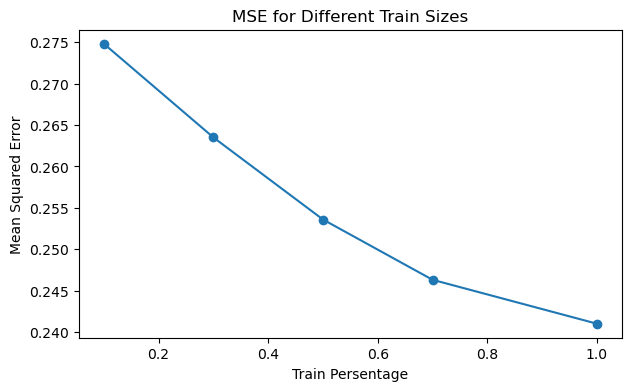

In [139]:
train_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]  # Train sizes to evaluate
mse_values = []

for train_size in train_sizes:
    # Create a subset of the train data based on the specified train size
    num_samples = int(train_size * len(X_train))
    X_train_subset = X_train[:num_samples]
    y_train_subset = y_train[:num_samples]

    model = RandomForestRegressor(min_samples_leaf=2, min_samples_split=27, n_estimators=400,random_state=12)

    model.fit(X_train_subset, y_train_subset)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the MSE values
plt.plot(train_sizes, mse_values, marker='o')
plt.xlabel("Train Persentage")
plt.ylabel("Mean Squared Error")
plt.title("MSE for Different Train Sizes")
plt.show()

### We recommend collecting more data to get better MSE results, as we have more data  the lower the MSE score is. Also, if we had more data, we would have split the data into train, test and validation to avoid any chance of tailoring the models to the test set and potentially get better results for the test.